In [1]:
# KNN Algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [45]:
df_target = df.groupby('target').size()

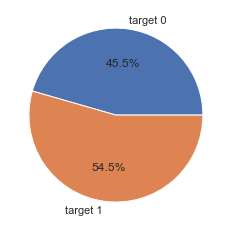

In [48]:
plt.pie(df_target.values, labels=['target 0', 'target 1'], autopct='%1.1f%%')
plt.show()

In [50]:
df_sex = df.groupby(['sex', 'target']).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

In [3]:
features = df.columns.drop('target')
# features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [4]:
X = pd.DataFrame(data=df, columns=features)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
scaler =  StandardScaler()

In [6]:
# scale_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [7]:
# scaler.fit(X[scale_col])
# x_scaled = scaler.transform(X[scale_col])
scaler.fit(X)

StandardScaler()

In [8]:
x_scaled = scaler.transform(X)

In [9]:
x_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [10]:
Y = pd.DataFrame(df['target'])
# Y.head()
Y = Y.values.flatten()
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,Y,train_size=0.8)

# Prediction using KNN Algorithm

In [12]:
tr_acc = []
ts_acc = []

for i in range(1,20):
    kmodel = KNeighborsClassifier(n_neighbors = i)
    kmodel.fit(xtrain,ytrain)

    tr_acc.append(kmodel.score(xtrain,ytrain))
    ts_acc.append(kmodel.score(xtest,ytest))

In [13]:
print("Training Accuracy: ", tr_acc)
print("******************************************")
print("******************************************")
print("Test Accuracy: ", ts_acc)

Training Accuracy:  [1.0, 0.871900826446281, 0.8842975206611571, 0.8553719008264463, 0.8842975206611571, 0.8553719008264463, 0.871900826446281, 0.859504132231405, 0.871900826446281, 0.8553719008264463, 0.8512396694214877, 0.859504132231405, 0.8553719008264463, 0.8471074380165289, 0.8512396694214877, 0.8636363636363636, 0.8305785123966942, 0.8388429752066116, 0.8388429752066116]
******************************************
******************************************
Test Accuracy:  [0.7704918032786885, 0.7868852459016393, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8524590163934426, 0.8360655737704918, 0.8852459016393442, 0.8688524590163934, 0.8360655737704918, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426, 0.819672131147541, 0.819672131147541, 0.8360655737704918, 0.8688524590163934, 0.8524590163934426, 0.8688524590163934]


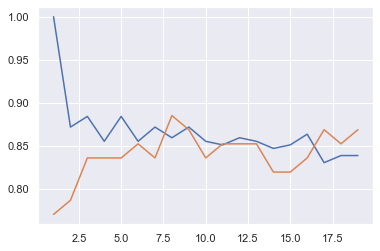

In [14]:
plt.plot(range(1,20) , tr_acc)
plt.plot(range(1,20) , ts_acc)     
plt.show()

# accuracy is best when k = 6

In [15]:
tr_acc[7]

0.859504132231405

In [16]:
ts_acc[7]

0.8852459016393442

# Prediction with Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lmodel = LogisticRegression()

In [19]:
lmodel.fit(xtrain, ytrain)

LogisticRegression()

In [20]:
ytrainPred = lmodel.predict(xtrain)

In [21]:
# Training Accuracy
(ytrain==ytrainPred).sum()/len(ytrain)

0.8388429752066116

In [22]:
# Testing Accuracy
ytestPred = lmodel.predict(xtest)

In [23]:
(ytest==ytestPred).sum()/len(ytest)

0.8360655737704918

# Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

# dmodel = DecisionTreeClassifier()
dmodel = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=4)
dmodel.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=4)

In [25]:
print(dmodel.score(xtrain, ytrain))
print(dmodel.score(xtest, ytest))

0.8264462809917356
0.819672131147541


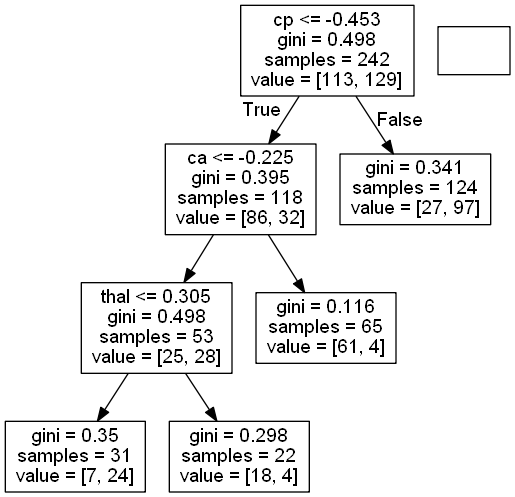

In [26]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus #py dot plus

# dot_data = export_graphviz(dmodel)
dot_data = export_graphviz(dmodel, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier(n_estimators=30, max_depth=8,max_leaf_nodes=15) # Will create 200 trees, the majority will make the decision

In [28]:
rmodel.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, max_leaf_nodes=15, n_estimators=30)

In [29]:
print(rmodel.score(xtrain, ytrain))
print(rmodel.score(xtest, ytest))

0.9214876033057852
0.8524590163934426


# Naive Bayes Algorithm

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nbmodel = GaussianNB()

In [32]:
nbmodel.fit(xtrain, ytrain)

GaussianNB()

In [33]:
print(nbmodel.score(xtrain, ytrain))
print(nbmodel.score(xtest, ytest))

0.8471074380165289
0.8360655737704918


# Support Vector Machines

In [34]:
from sklearn.svm import SVC

In [35]:
smodel = SVC(kernel='poly', probability=True)

In [36]:
smodel.fit(xtrain, ytrain)

SVC(kernel='poly', probability=True)

In [37]:
smodel.score(xtrain, ytrain)

0.9173553719008265

In [38]:
smodel.score(xtest, ytest)

0.8360655737704918

# Artificial Neural Networks

In [39]:
from keras import models, layers

In [40]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(64, input_dim=xtrain.shape[1]))